# In this notebook we make the histogram of accumulated optical depth by the photons.

We first make an analytical estimate of the optical depth of the straight line distance from the centre to the boundary of the sphere. The function `tau` returns the OD without accounting for the redshifting while `redshifted_tau` does.

In [13]:
import scipy.special as scsp
import numpy as np

lam0 = 1215.67/1e10
cE = 2.99792458e8
nu0 = cE/lam0
kmbyMpc=1/(3.086e19)
Om_m = 0.315
Ho = 67.4
z0 = 11.0094
N = 100000

def a(T):
    return 4.71e-4*np.sqrt(1e4/T)

def dopp_width(T):
    return 12.85e3*np.sqrt(T/1e4)/lam0

def tau(nHI,L,lam,T):
    x = (cE/lam-nu0)/dopp_width(T)
    sig = 3*lam0**2*a(T)/2*scsp.voigt_profile(x,1/np.sqrt(2),a(T))
    return sig*nHI*L

#Given a stating redshift z, what is the redshift when the photon has travelled a distance r.
def zprime(z,r):
    return z*(1+1.5*Ho*kmbyMpc*r/cE*np.sqrt(Om_m)*z**1.5)**(-2/3)

def redshifted_tau(nHI,L,lam,T):
    dL = L/N
    L_cum = dL/2
    total_od = 0
    for i in range(N):
        x = (cE/lam*zprime(z0,L_cum)/z0-nu0)/dopp_width(T)
        sig = 3*lam0**2*a(T)/2*scsp.voigt_profile(x,1/np.sqrt(2),a(T))
        total_od = total_od + sig*nHI*dL
        L_cum = L_cum + dL

    return total_od


print('Lyalpha',tau(254,0.499*5.62e23,lam0,30))
print('Lybeta',tau(254,0.499*5.62e23,27*lam0/32,30))
print('Lyalpha',redshifted_tau(254,0.499*5.62e23,lam0,30))
print('Lybeta',redshifted_tau(254,0.499*5.62e23,27*lam0/32,30))

7587106337.667996
0.00597361936914555
380528.4391990965
0.008055810518708384


In the below notebooks, I make a $\tau$ distribution for photons released with a broad SED, at Ly$\alpha$ or at Ly$\beta$ in the following system:
- Hubble expanding medium at $z=10.0094$ so that `fix_nhi = 2.546e-4`
- Sphere radius 100 cMpc and `comput_dom_rsp = 0.499`, so that `fix_box_size_cm = 5.62e25`
- `RASCAS` run on `hydro-cool3/output_00013`
- Gas temperature at $30\,$K so that `fix_vth = 70656.21`
- Total number of MC photons $=10^6$

The code takes $\sim4647$ seconds to run on 240 CPUs with `nbundle=400` for photons released at Ly$\alpha$ and $\sim1085$ seconds for Ly$\beta$.

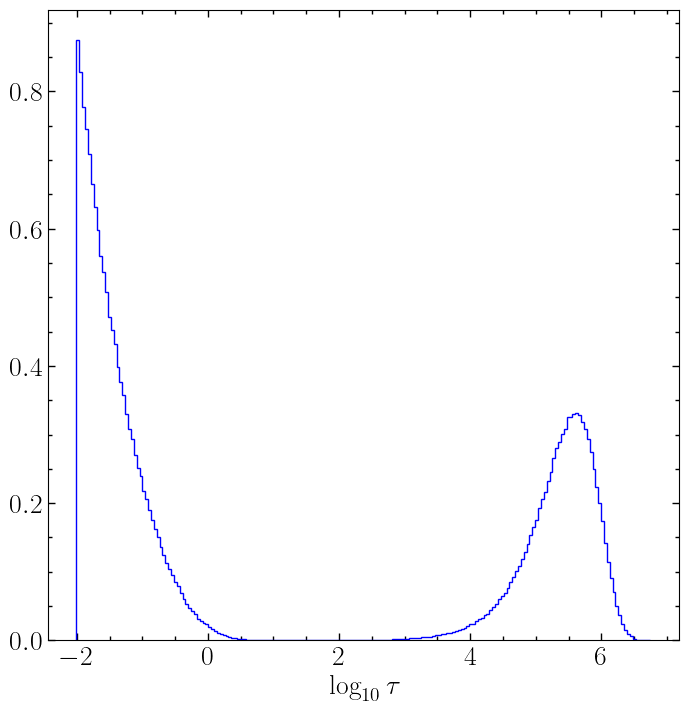

In [3]:
#This one is for broad SED: flat by number in frequency space.
import sys
sys.path.insert(0, '/home/shikhar/Dropbox/lymana/rascas/')
import photons as p
import numpy as np
from matplotlib import pyplot as plt

log_tau = np.log10(p.from_file('/home/shikhar/work/Semelin/step3_p1e6_broad.dat').tau)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.5))
fig.subplots_adjust(left=0.12, bottom=0.07, right=0.88, top=0.97)
ax.hist(log_tau,bins=200,density=True,color='blue',histtype='step')#,log=True)
#ax.legend()
ax.set_xlabel(r'$\log_{10}\tau$', fontsize=20)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1, direction='in')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('OD_distribution.pdf')

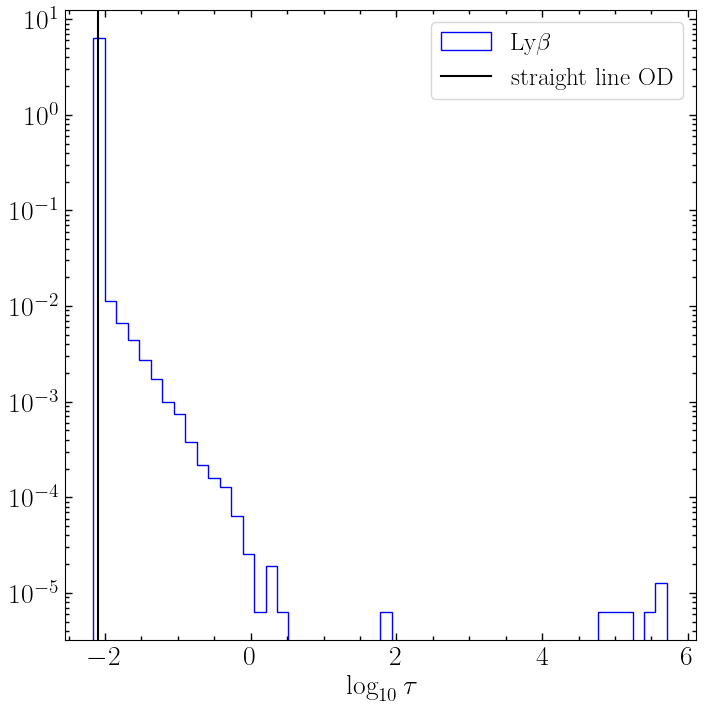

In [21]:
#This is for monochromatic SED.

import sys
sys.path.insert(0, '/home/shikhar/Dropbox/lymana/rascas/')
import photons as p
import numpy as np
from matplotlib import pyplot as plt

log_tau1 = np.log10(p.from_file('/home/shikhar/work/Semelin/step3_p1e6_mono_lybeta.dat').tau)
#log_tau2 = np.log10(p.from_file('/home/shikhar/work/Semelin/step3_p1e6_mono_lyalpha.dat').tau)

od_lyalpha = 380528.43
od_lybeta =  0.0080558

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig,ax=plt.subplots(figsize=(8.3,7.5))
fig.subplots_adjust(left=0.12, bottom=0.07, right=0.88, top=0.97)
ax.hist(log_tau1,bins=50,density=True,color='blue',histtype='step',label=r'Ly$\beta$',log=True)
#ax.hist(log_tau2,bins=200,density=True,color='red',histtype='step',label=r'Ly$\alpha$')#,log=True)
#ax.axvline(x=np.log10(od_lyalpha),color='k',label='straight line OD')
ax.axvline(x=np.log10(od_lybeta),color='k',label='straight line OD')
ax.legend(loc=1,fontsize=18)
ax.set_xlabel(r'$\log_{10}\tau$', fontsize=20)
#ax.set_ylabel('Fraction of photons', fontsize=20)
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='both', which='major', length=5, width=1, labelsize=20,direction='in')
ax.tick_params(axis='both', which='minor', length=3, width=1, direction='in')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('OD_Lya.pdf')